In [11]:
import os, sys
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

In [8]:
# Add the scripts to the notebooks path
current_dir = os.getcwd()
print(current_dir)
parent_dir = os.path.dirname(current_dir)
scripts_path = os.path.join(parent_dir, 'scripts')
sys.path.insert(0, parent_dir)
sys.path.insert(0, scripts_path)
sys.path.append(os.path.abspath(os.path.join('..')))

d:\Desktop\Bati-Bank-Credit-Scoring\notebooks


In [12]:
from scripts.exploratory_data_analyzer import EDAAnalyzer

In [13]:
# Load the dataset
PATH = "../data/data.csv"

In [14]:
if __name__ == '__main__':
    # Load Data
    try:
        data = pd.read_csv(PATH)
        print("Data Loaded Successfully!")
    except FileNotFoundError:
        print(f"Error: File not found at path: {PATH}")
        data=None

    if data is not None:
        # Initialize EDAAnalyzer
        eda_analyzer = EDAAnalyzer(data=data)

Data Loaded Successfully!


#### 1. Basic Overview and summary statistics"

In [15]:
eda_analyzer.basic_overview()

The data has a shape of: (95662, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-n

Generate descriptive statistics for the numerical data

In [16]:
eda_analyzer.summary_statistics()

       CountryCode        Amount         Value  PricingStrategy   FraudResult
count      95662.0  9.566200e+04  9.566200e+04     95662.000000  95662.000000
mean         256.0  6.717846e+03  9.900584e+03         2.255974      0.002018
std            0.0  1.233068e+05  1.231221e+05         0.732924      0.044872
min          256.0 -1.000000e+06  2.000000e+00         0.000000      0.000000
25%          256.0 -5.000000e+01  2.750000e+02         2.000000      0.000000
50%          256.0  1.000000e+03  1.000000e+03         2.000000      0.000000
75%          256.0  2.800000e+03  5.000000e+03         2.000000      0.000000
max          256.0  9.880000e+06  9.880000e+06         4.000000      1.000000


 Missing data identification

In [17]:
eda_analyzer.missing_values()

These are columns with missing values greater than 0%:
Series([], dtype: float64)


#### 2. Univariate Analysis

#### Numerical column distributions

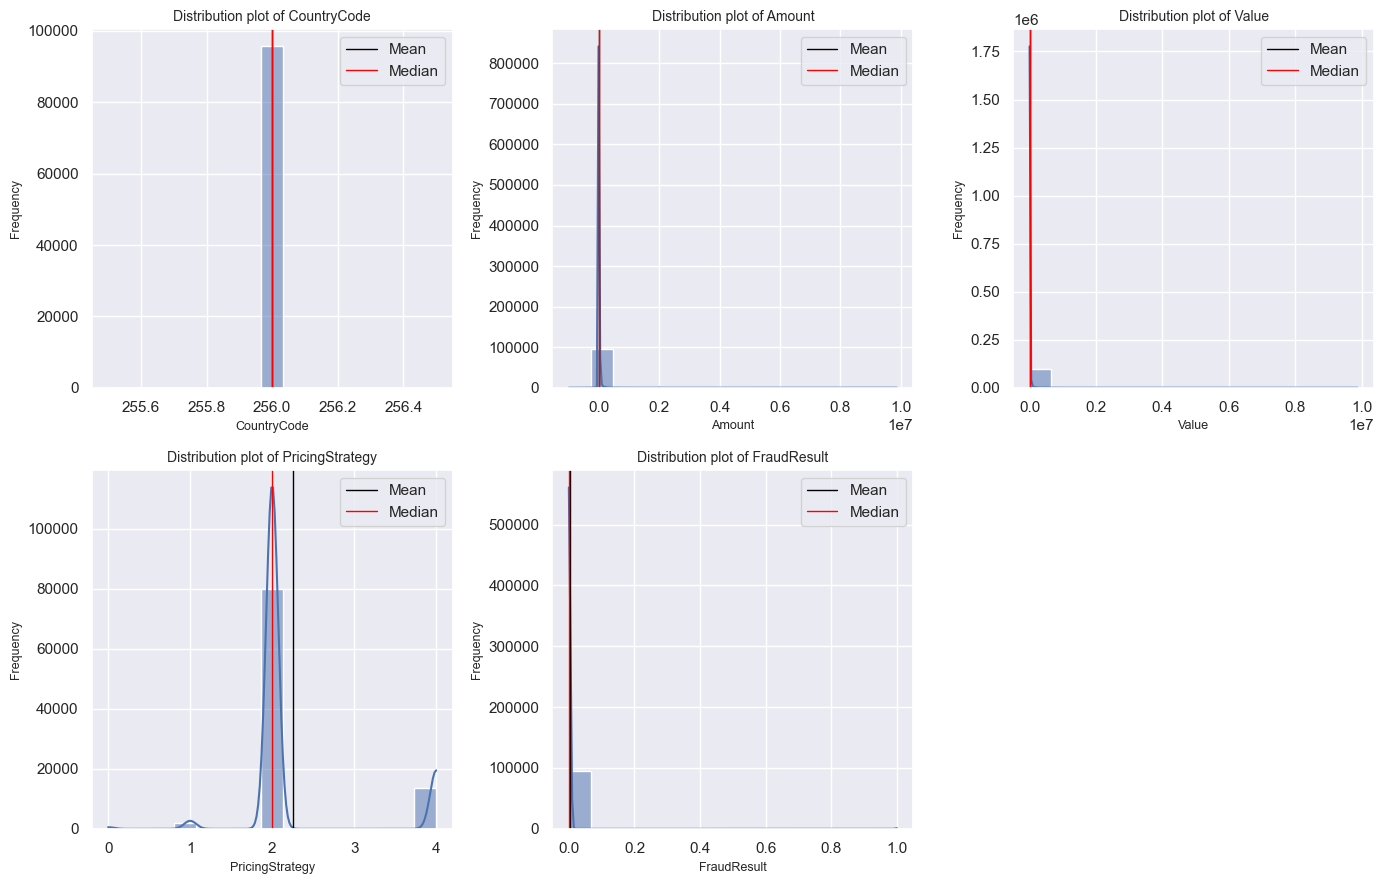

In [18]:
eda_analyzer.numerical_distribution()


    "From the plot we can see that:",
    "   - The **CountryCode** is a uniform value, consistently showing **256** across all transactions. This strongly suggests that this dataset represents activity within a single country, likely where Bati Bank primarily operates. Based on this, we can say the bank's operations within this dataset are focused on Uganda, given 256 is the country code for the country.",
    "   - The distributions for **Amount**, **Value**, **PricingStrategy**, and **FraudResult** all exhibit a noticeable right skew. This indicates that while a majority of transactions have lower values for these features, the averages are being influenced by a smaller number of significantly larger values.  This is a typical scenario in transactional data and implies the presence of potential outliers that require further attention during the modeling stage."


#### Investigate the skewness

d:\Desktop\Bati-Bank-Credit-Scoring\scripts\exploratory_data_analyzer.py:111: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(skewness_data, palette='husl')


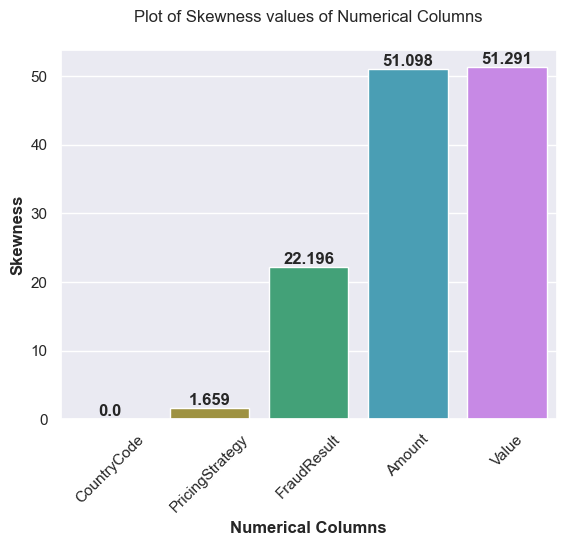

In [19]:
eda_analyzer.describe_skewness()

    "Based on the calculated skewness values, we can infer the following about our numerical features:",
        "   - **CountryCode:** exhibits no skewness, confirming our earlier observation that all transactions originate from a single country (Uganda, code 256), which also aligns with the fact Bati Bank operates in Uganda. This tells us we don't need to explore the country variable much.",
        "   - **PricingStrategy:** shows a slight positive skewness. This indicates that while the majority of users adhere to a common pricing structure, a smaller group are on the higher end of the scale with a different, probably less frequent, pricing strategy. This might point to some kind of rewards or premium program that Bati Bank offers.",
        "   - **FraudResult:** demonstrates a more significant positive skewness. This is expected since the dataset would contain a much larger number of legitimate transactions, i.e having a value of 0 and only a small number of the total transactions will be flagged as fraudulant, hence values of 1. This also implies that the values of 1 which are fraud cases, are the source of the skewness. ",
        "   - **Amount** and **Value:** both display substantial positive skewness, with values around 51. The substantial amount of skewness indicates that transaction amounts are clustered towards smaller values, with a few transactions involving significantly large amounts which inflate the average value of the transactions. This behavior is typical for transactional datasets."

d:\Desktop\Bati-Bank-Credit-Scoring\scripts\exploratory_data_analyzer.py:149: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns_plot = sns.barplot(data=grouping_counts, ax=axes[idx], palette='husl')
d:\Desktop\Bati-Bank-Credit-Scoring\scripts\exploratory_data_analyzer.py:149: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns_plot = sns.barplot(data=grouping_counts, ax=axes[idx], palette='husl')
d:\Desktop\Bati-Bank-Credit-Scoring\scripts\exploratory_data_analyzer.py:149: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns_plot = sns.barplot(data=grouping_counts, ax=axes[idx], pa

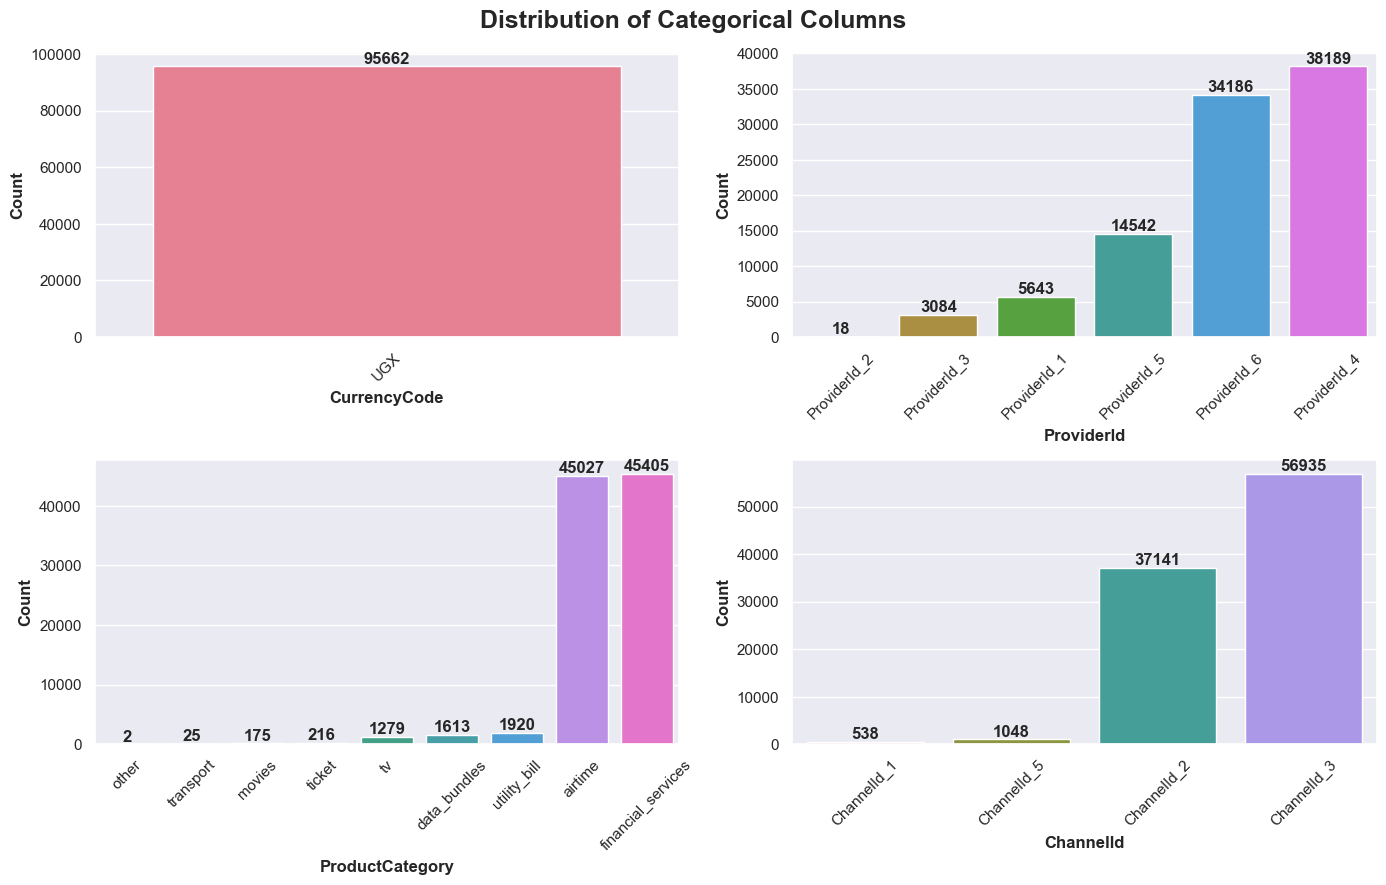

In [20]:
eda_analyzer.categorical_distribution()

    "Based on the categorical distributions visualized, here's what we can observe:",
    "    1.  **Currency Code**: All transactions are processed using only 'UGX'.  This confirms that Bati Bank, within this dataset, operates exclusively using the Ugandan Shilling, suggesting a focus on the local Ugandan market. This can also give a sense on where the bank is most likely located or where it primarily has its operations.",
        "   2.  **Provider Distribution**: The transactional data includes activity involving six different providers. Looking at the volume of transactions attributed to each:",
        "        - **Provider_2**: appears to be a very marginal player, with only **18** transactions. It's likely a very small or inactive provider in this context.",
        "        - **Provider_3** and **Provider_1**: handle a small, but noticeable number of transactions at **3084** and **5643**, respectively, suggesting they are somewhat relevant but not as impactful.",
        "        - **Provider_5**: contributes a moderate volume of transactions, at **14542**, holding an appreciable portion of the market.",
        "        - **Provider_6** and **Provider_4**: dominate the transactional landscape, managing a considerable amount of volume at **34186** and **38189**, respectively, showing that most of the transactions are done with these two sources. ",
        "    3.  **Product Categories**: The data involves nine different product categories, each representing the nature of the transactions. It is important to consider the frequency of the following categories: ",
        "        - **other**, **transport**, **movies**, and **ticket** categories record a very small amount of activity. These all indicate that they may not be the main use case of the bank, where the transactions for such are **2**, **25**, **175**, and **216**, respectively, showing a very marginal count.",
        "        - **tv**, **data_bundles**, and **utility_bill** represent more frequently occurring transaction categories, all with transactions in the thousands, indicating they are reasonably popular. The transaction count are **1279**, **1613**, and **1920**, respectively.",
        "   4.  **Transaction Channels**: When it comes to transaction channels, we find a significant disparity in use:",
        "        -  **ChannelId_2** and **ChannelId_3** are the most widely used methods of access, with **37141** and **56935** transactions respectively, demonstrating the clear preference for those particular channels.",
        "        -  **ChannelId_1** and **ChannelId_5** are far less utilized, recording **538** and **1048** transactions respectively. This means that these channels may not be user friendly or the bank has not pushed the use of this specific channels as the others."

#### 3. Bivariate Analysis

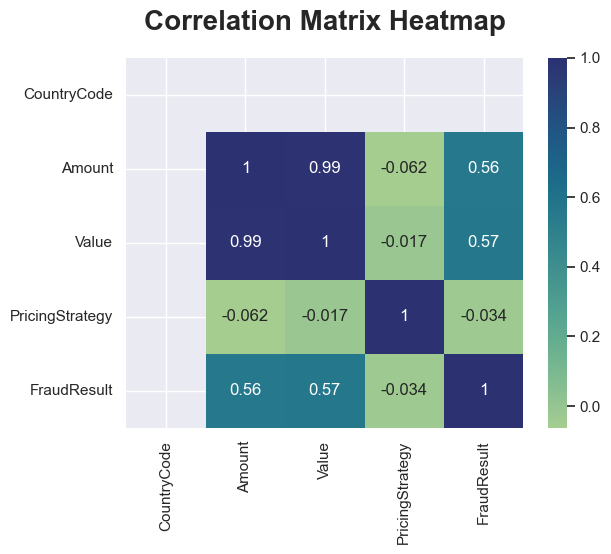

In [21]:
eda_analyzer.correlation_analysis()

    "Analyzing the correlation heatmap, here are a few key takeaways:\n",
        "  - **Amount and Value Correlation**:  The exceptionally high correlation of **0.99** between Amount and Value is not surprising. In essence, 'Value' represents the absolute magnitude of 'Amount,'  whether it's a payment or a refund/withdrawal. This indicates a direct dependency between these features, so we won't be treating them as separate for predictive tasks as they represent almost the same thing.\n",
        "   - **FraudResult and Amount/Value**: There's a noticeable positive relationship between the 'FraudResult' and the 'Amount/Value'.  This suggests that transactions involving higher amounts (or higher value) are somewhat more likely to be flagged as fraudulent. This positive correlation is something we must explore further in our feature engineering process.\n",
        "   -  **PricingStrategy Correlation**: The 'PricingStrategy' variable exhibits only very weak and negative correlations with the other numerical features.  These correlations are so close to zero that we can consider them to be practically negligible. This suggests that the pricing strategy used has no meaningful linear relationship with other numerical aspects of the transaction."

#### 4. Outlier Detection"

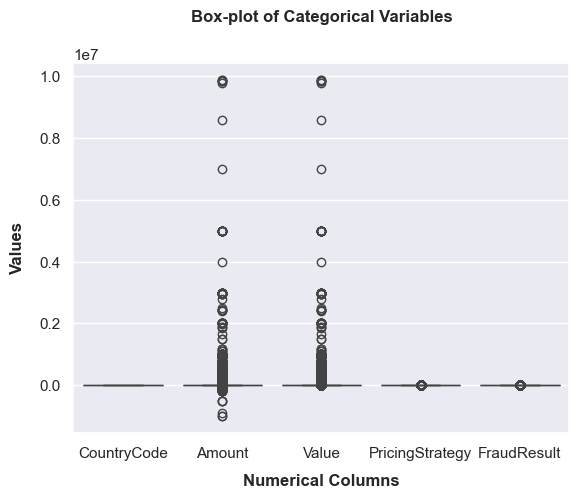

In [26]:
eda_analyzer.outlire_detection()


d:\Desktop\Bati-Bank-Credit-Scoring\scripts\exploratory_data_analyzer.py:225: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(outliers, x='Columns', y='Num. of Outliers', palette='husl')


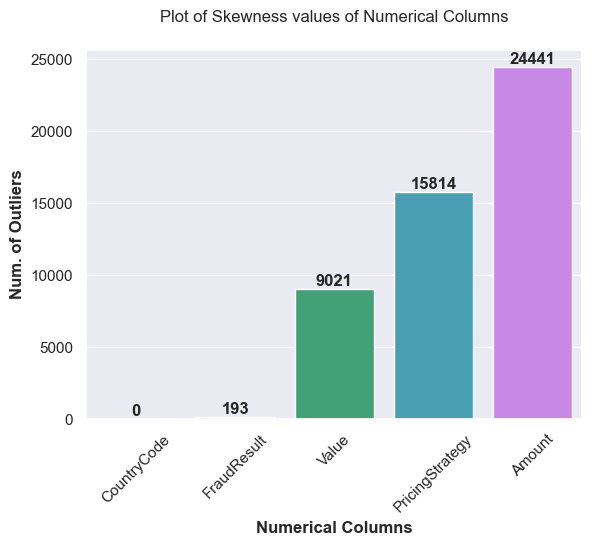

In [29]:
eda_analyzer.count_outliers()

#### 5. Fraudulent Transaction Analysis

d:\Desktop\Bati-Bank-Credit-Scoring\scripts\exploratory_data_analyzer.py:265: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(bin_counts,  palette='husl')


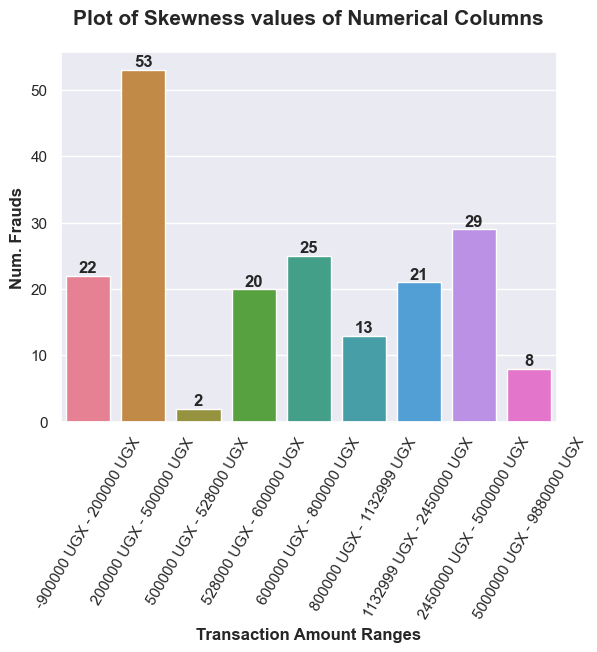

In [28]:
eda_analyzer.fraud_analysis()

    "Upon examining the boxplots, we have identified a number of potential outliers within the numerical features. Here is a breakdown of how these outliers are distributed across the numerical columns:\n",
        "  - **CountryCode**: This feature presents no outliers, this reiterates the fact that, all transactions are coming from one country, Uganda which is indicated with the country code **256**.\n",
        "  - **FraudResult**: There are a small but not insignificant amount of outliers, totaling **193**, which correspond to transactions flagged as fraudulent. This indicates that these cases are an anomally within the data and we need to look into them more closely.\n",
        "  - **Value**: A relatively large number of transactions, **9021**, are flagged as outliers based on value. This suggests that there are a number of users engaging in transactions that either go above or below a certain threshold compared to the majority.\n",
        "  - **PricingStrategy**: The number of outliers is also considerably high at **15814**. This reveals that the pricing strategy applied to a large portion of the customer base is different than most of the users. These could potentially represent the users who use different channels or are enrolled to special programs offered by the bank\n",
        "  - **Amount**: There is a high volume of outliers in the Amount column at **24387**, suggesting a large variance in the transaction amounts. While most transactions are of a comparable amount, a significant number deviate either on the higher or the lower end which may need investigation. This makes sense given that a few wealthy users might move significantly larger amount and small purchases inflate the low side of this transaction amount."

#### 5. Fraudulent Transaction Analysis

d:\Desktop\Bati-Bank-Credit-Scoring\scripts\exploratory_data_analyzer.py:265: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(bin_counts,  palette='husl')


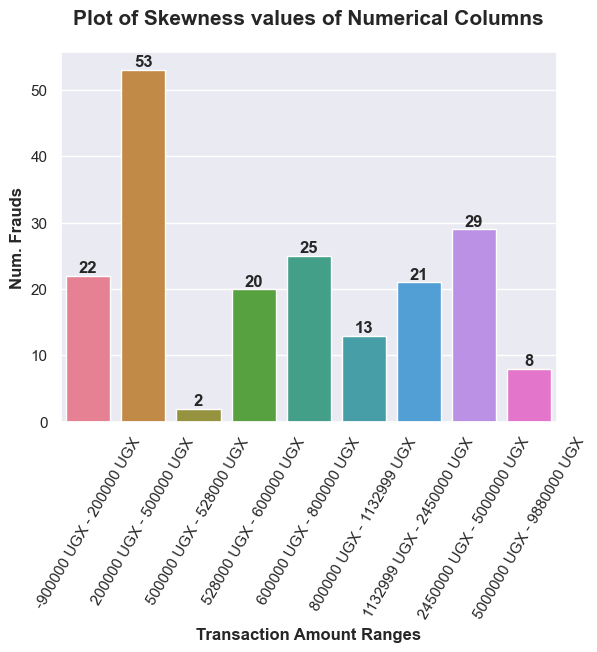

In [30]:
eda_analyzer.fraud_analysis()

    "After examining the fraud distribution across different transaction amount ranges, here's what we can conclude:\n",
        "  - The highest incidence of fraud is observed within the transaction range of **200,000 UGX to 500,000 UGX**. This could mean that fraudsters prefer to operate in this range as it's still significant enough to warrant the risk, but not too high that they draw the bank's suspicion.\n",
        "  - Except for two ranges, most of the rest of the transaction categories have similar fraud incidents, hovering around **20 to 30**. This indicates that fraud is happening in most of the ranges.\n",
        "  - The ranges **500,000 UGX to 528,000 UGX** and **5,000,000 UGX to 9,880,000 UGX** both have a notably lower number of fraudulent transactions.  This could be attributed to:\n",
            "      - The **500,000 UGX to 528,000 UGX** range being relatively narrow which is 28,000 UGX, meaning fewer data points fall within this bin. \n",
            "      - The **5,000,000 UGX to 9,880,000 UGX** range representing an unusually large value, which means that there aren't many transactions that have that amount and that transactions of this magnitude are typically conducted more cautiously by users making them less likely to be exploited by fraudsters."